# STANFORD ML COURSE

## Lecture 1 Linear Regression

### Univariate Regression

Cost Function $J(\theta_0, \theta_1)$ tries to minimize the distance between true and predicted samples. <br>
e.g: $J(\theta_0, \theta_1) = \frac{1}{2m}\sum_{i=1}^{m} (y_i-\hat{y}_i)^2 =
\frac{1}{2m}\sum_{i=1}^{m} (y_i-h_{\theta} x_i)^2$ <br>

**Gradient Descent** <br>
Update: $\theta_j = \theta_j - \alpha \frac{\partial J}{\partial \theta_j} J(\theta_0, \theta_1)$

$\frac{\partial J}{\partial \theta_1} = \frac{1}{2m}\sum_{i=1}^{m} \frac{\partial}{\partial \theta_1} (y_i-h_{\theta} x_i)^2 = \frac{1}{m} \sum_{i=1}^{m} (y_i-h_{\theta} x_i )x_i$

**Normal Equation** <br>
This can also be solved, by setting the derivative equal to zero and solving for $\theta$. The result is the socalled normal equation:

$\theta_{ML} = (X^TX)^{-1}X^Ty $

The normal equation results by solving maximum likelihood, which is equal to minimizing the sum of squared errors.

Basically it's equal to setting the gradient equal to zero and solving for $\theta$: <br>
$\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (y_i-h_{\theta} x_i )x_i = \frac{1}{m} \sum_{i=1}^{m} (y_i x_i-h_{\theta} x_i^2 )$




**Computational Complexity** <br>
Gradient Descent: $O(kn^2)$ <br>
Normal Equation: $O(n^3)$

### Multivariate

The cost function can also be written in vectorized form (dot product instead of sum size):
$J(\theta) = \frac{1}{2m}(X\theta-\vec{y})^T (X\theta-\vec{y})$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Let's create fake data:
f = lambda x: 2*x -2 
x = np.arange(-5,5, 0.5)
y = f(x) + 4*np.random.rand(len(x))

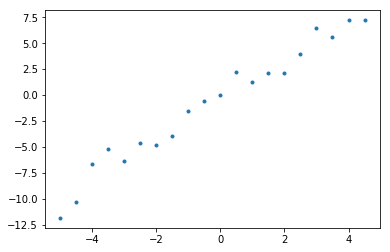

In [3]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x,y,'.')

In [4]:
xx = [np.ones(len(x)),x]

In [5]:
def cost_function(w0, w1, xx, y):
    m = len(y)
    w = np.matrix([w0,w1])
    x = np.matrix(xx)
    y_hat = np.dot(w,x)
    diff = np.sum(np.power(y_hat-y,2))/(2*m)
    return diff

def updater(w0, w1, xx, y, alpha):
    m = len(y)
    w = np.matrix([w0,w1])
    x = np.matrix(xx)
    y_hat = np.dot(w,x)
    update0 = np.sum(y_hat-y)/m
    update1 = np.sum(x[:,1]*(y_hat-y))/m
    #print("up0: {}; up1: {}".format(update0,update1))
    w0_new = w0 - alpha*update0
    w1_new = w1 - alpha*update1
    return w0_new, w1_new

In [6]:
w0 = 0.5
w1 = 0.2
print (cost_function(w0,w1, xx, y))
for i in range(1000):
    w0, w1 = updater(w0,w1, xx, y, 0.01)
    if i%100 == 0:
        print ("cost: {}, w1: {}, w1:{}".format(cost_function(w0,w1, xx, y), w0, w1))
diff = cost_function(w0,w1, xx, y)

13.135292253420698
cost: 12.467804841007633, w1: 0.486834280670286, w1:0.2460800176539989
cost: 1.242676432748681, w1: -0.09837346337328508, w1:2.2943071218065
cost: 2.678482166741837, w1: -0.18653457139796853, w1:2.6028709998928945
cost: 2.9657499932672677, w1: -0.19981597624479358, w1:2.649355916856783
cost: 3.010637235410811, w1: -0.20181680993050333, w1:2.6563588347567646
cost: 3.017436016758601, w1: -0.20211823402562265, w1:2.657413819089684
cost: 3.018461077626895, w1: -0.20216364333963413, w1:2.657572751688723
cost: 3.018615521105307, w1: -0.2021704842187555, w1:2.6575966947656475
cost: 3.018638788326861, w1: -0.2021715147920678, w1:2.657600301772242
cost: 3.0186422935260495, w1: -0.20217167004716477, w1:2.6576008451650823


ValueError: x and y must have same first dimension, but have shapes (20,) and (47,)

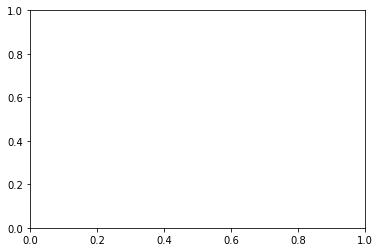

In [58]:
y_hat = lambda x: w0*x+w1*x
y_pred = y_hat(x)
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x,y,'.')
ax.plot(x,y_pred, '-')

In [11]:
import csv
filename = "ex1/ex1data2.txt"
data = []
with open (filename, 'r') as file:
    
    for row in csv.reader(file):
        data.append(row)
data = np.array(data)

In [41]:
X = np.ones([len(data), np.shape(data)[1]])
X[:,1:] = data[:,:-1]
y = (data[:,-1]).astype(float)
yM = np.asmatrix(y)
# Solve weights with normal equation:
X = np.asmatrix(X)
t1 = np.linalg.inv(np.dot(X.T,X))
t2= np.dot(X.T,yM.T)
weights = np.dot(t1,t2)

In [57]:
print(y)
print(y_pred.ravel())

[399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]
[356283.1103389  286120.93063402 397489.46984812 269244.1857271
 472277.85514636 330979.02101847 276933.02614885 262037.48402897
 255494.58235014 271364.59918815 324714.54068768 341805.20024107
 326492.02609913 669293.21223209 239902.98686016 374830.38333403
 255879.96102141 235448.2452916  417846.48160547 476593.38604091
 309369.11319496 334951.62386342 286677.77333009 327777.17551607
 604913.37413438 216515.5936252  266353.01492351 415030.01477434
 369647.33504459 430482.39959029 328130.30083656 220070.5644481
 338635.60808944 500087.73659911 306756.36373941 263429.59076914
 235865.87731365 351442.99009907 6

In [55]:
from sklearn.metrics import f1_score
y_pred = np.array(np.dot(X,weights))
m = len(y)
diff = np.sum(np.power(y_pred.ravel()-y,2))/(2*m)
print(diff)

2043280050.6028287
